In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
from scipy import stats
# import seabscatterplot
# from sklearn import prscatterplot
# from sklearn import prscatterplot

Read all the data sets. Format all column headings by removing all spaces. The goal here is to keep all column headings consistent throughout all the datasets.

In [14]:
df_happy_2015 = pd.read_csv(r"2015.csv")
df_happy_2015.columns=df_happy_2015.columns.str.replace('[), (, ., \s]','')
df_happy_2016 = pd.read_csv(r"2016.csv")
df_happy_2016.columns=df_happy_2016.columns.str.replace('[), (, ., \s]','')
df_happy_2017 = pd.read_csv(r"2017.csv")
df_happy_2017.columns=df_happy_2017.columns.str.replace('[), (, ., \s]','')
df_happy_2018 = pd.read_csv(r"2018.csv")
df_happy_2018.columns=df_happy_2018.columns.str.replace('[), (, ., \s]','')
df_happy_2018 = df_happy_2018.rename(columns={"Overallrank":"HappinessRank", "Countryorregion":"Region","Score":"HappinessScore", "GDPpercapita":"EconomyGDPperCapita", "Healthylifeexpectancy":"HealthLifeExpectancy", "Freedomtomakelifechoices":"Freedom", "Perceptionsofcorruption":"TrustGovernmentCorruption"})
df_happy_2019 = pd.read_csv(r"2019.csv")
df_happy_2019.columns=df_happy_2019.columns.str.replace('[), (, ., \s]','')
df_happy_2019 = df_happy_2019.rename(columns={"Overallrank":"HappinessRank", "Countryorregion":"Region","Score":"HappinessScore", "GDPpercapita":"EconomyGDPperCapita", "Healthylifeexpectancy":"HealthLifeExpectancy", "Freedomtomakelifechoices":"Freedom", "Perceptionsofcorruption":"TrustGovernmentCorruption"})
df_250_countries = pd.read_csv(r"250 Country Data.csv", index_col=0)
df_250_countries.columns=df_250_countries.columns.str.replace('[., \s]','')
df_life_expectancy = pd.read_csv(r"Life Expectancy Data.csv")
df_life_expectancy.columns=df_life_expectancy.columns.str.replace('[., \s]','')


print(list(df_happy_2015.columns))
print('\n')
print(list(df_happy_2016.columns))
print('\n')
print(list(df_happy_2017.columns))
print('\n')
print(list(df_happy_2018.columns))
print('\n')
print(list(df_happy_2019.columns))

# df_happy_2018.head()
#df_life_expectancy.head()

['Country', 'Region', 'HappinessRank', 'HappinessScore', 'StandardError', 'EconomyGDPperCapita', 'Family', 'HealthLifeExpectancy', 'Freedom', 'TrustGovernmentCorruption', 'Generosity', 'DystopiaResidual']


['Country', 'Region', 'HappinessRank', 'HappinessScore', 'LowerConfidenceInterval', 'UpperConfidenceInterval', 'EconomyGDPperCapita', 'Family', 'HealthLifeExpectancy', 'Freedom', 'TrustGovernmentCorruption', 'Generosity', 'DystopiaResidual']


['Country', 'HappinessRank', 'HappinessScore', 'Whiskerhigh', 'Whiskerlow', 'EconomyGDPperCapita', 'Family', 'HealthLifeExpectancy', 'Freedom', 'Generosity', 'TrustGovernmentCorruption', 'DystopiaResidual']


['HappinessRank', 'Region', 'HappinessScore', 'EconomyGDPperCapita', 'Socialsupport', 'HealthLifeExpectancy', 'Freedom', 'Generosity', 'TrustGovernmentCorruption']


['HappinessRank', 'Region', 'HappinessScore', 'EconomyGDPperCapita', 'Socialsupport', 'HealthLifeExpectancy', 'Freedom', 'Generosity', 'TrustGovernmentCorruption']


We are going to integrate the 3 datasets into 1 to investigate further into the research questions. The new dataset is going to include all Countries common in all 3 datasets.

Here we are trying to use all the information from the happiness datasets from all the years. We created a new dataset that holds the mean of all values of the recorded years.

In [15]:
# h_df = df_happy_2015
df_happy_2015["Socialsupport"] = (df_happy_2018["Socialsupport"] + df_happy_2019["Socialsupport"])/2
df_happy_2016["Socialsupport"] = (df_happy_2018["Socialsupport"] + df_happy_2019["Socialsupport"])/2
df_happy_2017["Socialsupport"] = (df_happy_2018["Socialsupport"] + df_happy_2019["Socialsupport"])/2
df_happy_2015 = pd.concat([df_happy_2015, df_happy_2016, df_happy_2017, df_happy_2018, df_happy_2019]).groupby("Country").mean()

df_happy_2015 = df_happy_2015.drop(columns=["HappinessRank","StandardError","LowerConfidenceInterval", "UpperConfidenceInterval", "Whiskerhigh", "Whiskerlow"])

df_happy_2015.reset_index(level=0, inplace=True)
df_happy_2015.head()
# df_happy_2015
# list(df_happy_2015.columns)


,Country,HappinessScore,EconomyGDPperCapita,Family,HealthLifeExpectancy,Freedom,TrustGovernmentCorruption,Generosity,DystopiaResidual,Socialsupport
0,Afghanistan,3.576333,0.367856,0.331588,0.219179,0.168207,0.076489,0.329884,2.082827,0.856333
1,Albania,4.752667,0.943388,0.703218,0.758160,0.352496,0.052335,0.170811,1.772514,1.194000
2,Algeria,5.944000,1.027938,1.019009,0.617762,0.243062,0.160499,0.072699,2.802911,1.483333
3,Angola,3.898000,0.821173,0.876157,0.088870,0.036577,0.075093,0.114025,1.886154,0.995500
4,Argentina,6.607667,1.130058,1.251600,0.726492,0.455700,0.072513,0.111286,2.859952,1.380167


Now we work on all country data. Variable "research_df" is our new dataset. We drop all the unnecessary columns or columns with too many NaN values that would be hard to impute / no way to impute. Some values were able to be imputed, like Unemployment, Alcohol and Hepatitis B, but some others the information was very little and imputuation would not be the most accurate.

In [11]:
research_df = df_250_countries.copy()
research_df = research_df.drop(columns=["gini","RealGrowthRating(%)", "LiteracyRate(%)", "Inflation(%)"])
research_df = research_df.rename(columns={"name":"Country", "region":"Region","population":"Population","area":"Area","subregion":"Subregion"})
research_df["Unemployement(%)"] = research_df["Unemployement(%)"].str.split('%').str.get(0)
region_df = research_df[pd.to_numeric(research_df["Unemployement(%)"], errors='coerce').notnull()]
region_df_copy = region_df.copy()
region_df_copy["Unemployement(%)"] = region_df_copy["Unemployement(%)"].astype(float)
region_df_copy = region_df_copy.groupby(["Region"])["Unemployement(%)"].mean()
research_df["Unemployement(%)"] = research_df.apply(
    lambda row: row["Unemployement(%)"] if ''.join(filter(str.isalnum, str(row["Unemployement(%)"]))).isnumeric() else region_df_copy.get(str(row["Region"])),
    axis=1
)

for i in range(len(research_df["Unemployement(%)"])):
    # try:
    if (research_df["Unemployement(%)"][i] == "10.9."):
        research_df["Unemployement(%)"][i] = research_df["Unemployement(%)"][i][0:-1]
        # research_df["Unemployement(%)"][i] = float(val)
    # except:
        # research_df["Unemployement(%)"][i] = 0.0
research_df

<ipython-input-11-c119bbdfd60a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  research_df["Unemployement(%)"][i] = research_df["Unemployement(%)"][i][0:-1]


,Country,Region,Subregion,Population,Area,Unemployement(%)
0,Afghanistan,Asia,Southern Asia,27657145,652230.0,35
1,Åland Islands,Europe,Northern Europe,28875,1580.0,10.1833
2,Albania,Europe,Southern Europe,2886026,28748.0,16.9
3,Algeria,Africa,Northern Africa,40400000,2381741.0,10.3
4,American Samoa,Oceania,Polynesia,57100,199.0,17.8858
...,...,...,...,...,...,...
245,Wallis and Futuna,Oceania,Polynesia,11750,142.0,17.8858
246,Western Sahara,Africa,Northern Africa,510713,266000.0,28.0621
247,Yemen,Asia,Western Asia,27478000,527968.0,35
248,Zambia,Africa,Eastern Africa,15933883,752612.0,15


We integrate the new dataset with the happiness records dataset, up to 2015. (Latest recoreded year in the happiness dataset)

In [6]:
research_df = pd.merge(df_happy_2015, research_df, how='inner', on = 'Country')
research_df = research_df.drop(columns=["Family", "DystopiaResidual"])
research_df

,Country,HappinessScore_x,EconomyGDPperCapita_x,HealthLifeExpectancy_x,Freedom_x,TrustGovernmentCorruption_x,Generosity_x,Socialsupport_x,HappinessScore_y,EconomyGDPperCapita_y,HealthLifeExpectancy_y,Freedom_y,TrustGovernmentCorruption_y,Generosity_y,Socialsupport_y,Region,Subregion,Population,Area,Unemployement(%)
0,Afghanistan,3.576333,0.367856,0.219179,0.168207,0.076489,0.329884,0.856333,3.576333,0.367856,0.219179,0.168207,0.076489,0.329884,0.856333,Asia,Southern Asia,27657145,652230.0,35
1,Albania,4.752667,0.943388,0.758160,0.352496,0.052335,0.170811,1.194000,4.752667,0.943388,0.758160,0.352496,0.052335,0.170811,1.194000,Europe,Southern Europe,2886026,28748.0,16.9
2,Algeria,5.944000,1.027938,0.617762,0.243062,0.160499,0.072699,1.483333,5.944000,1.027938,0.617762,0.243062,0.160499,0.072699,1.483333,Africa,Northern Africa,40400000,2381741.0,10.3
3,Angola,3.898000,0.821173,0.088870,0.036577,0.075093,0.114025,0.995500,3.898000,0.821173,0.088870,0.036577,0.075093,0.114025,0.995500,Africa,Middle Africa,25868000,1246700.0,28.0621
4,Argentina,6.607667,1.130058,0.726492,0.455700,0.072513,0.111286,1.380167,6.607667,1.130058,0.726492,0.455700,0.072513,0.111286,1.380167,Americas,South America,43590400,2780400.0,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Uruguay,6.494667,1.153597,0.750882,0.575631,0.212527,0.196019,1.392333,6.494667,1.153597,0.750882,0.575631,0.212527,0.196019,1.392333,Americas,South America,3480222,181034.0,6.5
139,Uzbekistan,5.987000,0.718264,0.532541,0.641646,0.279373,0.329205,1.394000,5.987000,0.718264,0.532541,0.641646,0.279373,0.329205,1.394000,Asia,Central Asia,31576400,447400.0,4.9
140,Yemen,3.798000,0.572521,0.340400,0.277958,0.064742,0.097882,0.826333,3.798000,0.572521,0.340400,0.277958,0.064742,0.097882,0.826333,Asia,Western Asia,27478000,527968.0,35
141,Zambia,4.812667,0.572936,0.264269,0.458831,0.105895,0.208050,1.066500,4.812667,0.572936,0.264269,0.458831,0.105895,0.208050,1.066500,Africa,Eastern Africa,15933883,752612.0,15


In [43]:
research_df.index = np.arange(1, len(research_df) + 1)
research_df

,Country,HappinessScore,EconomyGDPperCapita,HealthLifeExpectancy,Freedom,TrustGovernmentCorruption,Generosity,Socialsupport,Region,Subregion,Population,Area,Unemployement(%)
1,Afghanistan,3.576333,0.367856,0.219179,0.168207,0.076489,0.329884,0.856333,Asia,Southern Asia,27657145,652230.0,35
2,Albania,4.752667,0.943388,0.758160,0.352496,0.052335,0.170811,1.194000,Europe,Southern Europe,2886026,28748.0,16.9
3,Algeria,5.944000,1.027938,0.617762,0.243062,0.160499,0.072699,1.483333,Africa,Northern Africa,40400000,2381741.0,10.3
4,Angola,3.898000,0.821173,0.088870,0.036577,0.075093,0.114025,0.995500,Africa,Middle Africa,25868000,1246700.0,28.0621
5,Argentina,6.607667,1.130058,0.726492,0.455700,0.072513,0.111286,1.380167,Americas,South America,43590400,2780400.0,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Uruguay,6.494667,1.153597,0.750882,0.575631,0.212527,0.196019,1.392333,Americas,South America,3480222,181034.0,6.5
140,Uzbekistan,5.987000,0.718264,0.532541,0.641646,0.279373,0.329205,1.394000,Asia,Central Asia,31576400,447400.0,4.9
141,Yemen,3.798000,0.572521,0.340400,0.277958,0.064742,0.097882,0.826333,Asia,Western Asia,27478000,527968.0,35
142,Zambia,4.812667,0.572936,0.264269,0.458831,0.105895,0.208050,1.066500,Africa,Eastern Africa,15933883,752612.0,15


Function "impute by mean" is a function that takes a dataset and a column that has a value that needs to be imputed. It imputes that value by calculating the mean of all the records of that countries data.

In [44]:
def impute_by_mean(df,column):
    frames = []
    for i in list(set(df['Country'])):
        df_country = df[df['Country']== i]
        if len(df_country) > 1:    
            df_country[column].fillna(df_country[column].mean(),inplace = True)        
        else:
            df_country[column].fillna(df[column].mean(),inplace = True)
        frames.append(df_country)    
        final_df = pd.concat(frames)
    return final_df

In the Life Expectancy dataset, the 2015 record for Alcohol in all countries were missing, so we imputed that value by calculating the mean for each countries Alcohol records up to 2015

In [45]:
df_alcohol_imputed = impute_by_mean(df_life_expectancy, "Alcohol")
df_alcohol_imputed.sort_values(by=['Country'])

D:\Program Files (x86)\Anaconda\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Zimbabwe,2012,Developing,56.6,429.0,26,6.09,92.602336,97.0,0,...,95.0,6.69,95.0,8.8,955.648466,1471826.0,6.5,6.4,0.464,9.8
2924,Zimbabwe,2013,Developing,58.0,399.0,25,6.39,10.666707,95.0,0,...,95.0,6.88,95.0,6.8,111.227396,155456.0,6.2,6.0,0.488,10.4
2923,Zimbabwe,2014,Developing,59.2,371.0,23,6.50,10.822595,91.0,0,...,92.0,6.44,91.0,6.3,127.474620,15411675.0,5.9,5.7,0.498,10.3
2929,Zimbabwe,2008,Developing,48.2,632.0,30,3.56,20.843429,75.0,0,...,75.0,4.96,75.0,20.5,325.678573,13558469.0,7.8,7.8,0.421,9.7


Impute missing values for Hepatitis B as well by calculating the mean

In [47]:
df_life_expectancy = df_alcohol_imputed.copy()
df_life_expectancy = impute_by_mean(df_life_expectancy, 'HepatitisB')

In [48]:
df_null_values = df_life_expectancy[df_life_expectancy["HepatitisB"].isna()]
df_null_values

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
1910,Norway,2015,Developed,81.8,59.0,0,5.97,0.000000,NaN,14,...,95.0,NaN,95.0,0.1,7455.24654,518867.0,0.8,0.7,0.948,17.7
1911,Norway,2014,Developed,81.6,61.0,0,6.06,177.638288,NaN,3,...,93.0,9.72,93.0,0.1,975.49856,5137232.0,0.8,0.7,0.945,17.7
1912,Norway,2013,Developed,81.5,62.0,0,6.21,234.782883,NaN,8,...,94.0,9.39,94.0,0.1,1291.43500,579623.0,0.8,0.7,0.942,17.5
1913,Norway,2012,Developed,81.3,61.0,0,6.21,2094.190960,NaN,4,...,95.0,9.16,95.0,0.1,11563.72700,518573.0,0.7,0.7,0.941,17.6
1914,Norway,2011,Developed,81.1,67.0,0,6.53,277.355052,NaN,39,...,94.0,9.14,94.0,0.1,1574.98610,495388.0,0.7,0.7,0.939,17.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,Hungary,2004,Developed,72.9,18.0,1,13.28,146.860802,NaN,0,...,99.0,8.80,99.0,0.1,1259.52660,117146.0,2.1,2.1,0.793,15.3
1166,Hungary,2003,Developed,72.5,184.0,1,13.24,1030.220271,NaN,0,...,99.0,8.42,99.0,0.1,8396.25323,1129552.0,2.1,2.1,0.784,14.9
1167,Hungary,2002,Developed,72.5,184.0,1,13.29,8.986198,NaN,0,...,98.0,7.47,99.0,0.1,665.64430,115868.0,2.2,2.2,0.775,14.6
1168,Hungary,2001,Developed,72.3,185.0,1,13.18,7.601092,NaN,20,...,99.0,7.11,99.0,0.1,527.85364,1187576.0,2.2,2.2,0.769,14.2


final_df_life_expectancy is the modified dataset for life expectancy dataset before integrating it into our research dataset.

In [49]:
final_df_life_expectancy = df_life_expectancy.copy()
final_df_life_expectancy = final_df_life_expectancy.drop(columns={"Status", "Year" , "GDP" , "percentageexpenditure" ,"Population", "Totalexpenditure" ,"Incomecompositionofresources", "thinness1-19years", "thinness5-9years"})
final_df_life_expectancy = final_df_life_expectancy.groupby(['Country']).mean()
final_df_life_expectancy.isnull().sum()

Lifeexpectancy      10
AdultMortality      10
infantdeaths         0
Alcohol              1
HepatitisB           9
Measles              0
BMI                  4
under-fivedeaths     0
Polio                0
Diphtheria           0
HIV/AIDS             0
Schooling           13
dtype: int64

We cut down the number of NaN values as we can see for important variables  like Alcohol and Hepatitis B

Finally, we integrate it into our research dataset in order to start looking for research questions

In [50]:
research_df_final = research_df.copy()
research_df_final = pd.merge(research_df_final,final_df_life_expectancy ,how='inner', on = 'Country')
research_df_final = research_df_final.sort_values(by='HappinessScore', ascending=False)
research_df_final = research_df_final.reset_index(drop=True)
research_df_final.isnull().sum()

Country                      0
HappinessScore               0
EconomyGDPperCapita          0
HealthLifeExpectancy         0
Freedom                      0
TrustGovernmentCorruption    0
Generosity                   0
Socialsupport                0
Region                       0
Subregion                    0
Population                   0
Area                         0
Unemployement(%)             0
Lifeexpectancy               0
AdultMortality               0
infantdeaths                 0
Alcohol                      1
HepatitisB                   8
Measles                      0
BMI                          2
under-fivedeaths             0
Polio                        0
Diphtheria                   0
HIV/AIDS                     0
Schooling                    1
dtype: int64

In [51]:
research_df_final.shape

(139, 25)

In [52]:
list(research_df_final.columns)

['Country',
 'HappinessScore',
 'EconomyGDPperCapita',
 'HealthLifeExpectancy',
 'Freedom',
 'TrustGovernmentCorruption',
 'Generosity',
 'Socialsupport',
 'Region',
 'Subregion',
 'Population',
 'Area',
 'Unemployement(%)',
 'Lifeexpectancy',
 'AdultMortality',
 'infantdeaths',
 'Alcohol',
 'HepatitisB',
 'Measles',
 'BMI',
 'under-fivedeaths',
 'Polio',
 'Diphtheria',
 'HIV/AIDS',
 'Schooling']

Now that we have our integrated datasets. Values with NaN or Countries that weren't in all 3 datasets were dropped. We work in visualization to find research questions

The bar chart below shows the average happiness score of all regions, as can be seen some regions have significantly higher happiness scores than others e.g. Oceania vs Africa.
It can also be seen that as the average happiness score of a region increases, so does life expectancy of that region.

<ipython-input-53-64fed0be72b7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  region_df = research_df_final.groupby(['Region'])['HappinessScore', 'Lifeexpectancy'].mean().sort_values(by='HappinessScore', ascending=True)


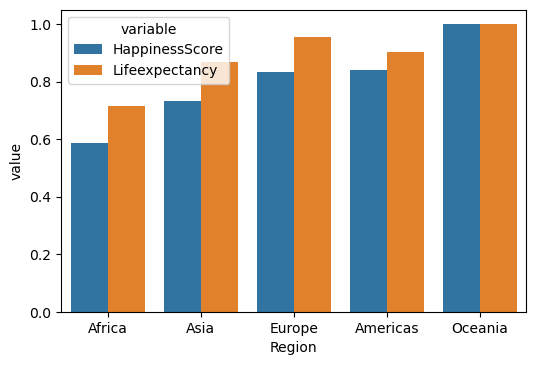

In [53]:
region_df = research_df_final.groupby(['Region'])['HappinessScore', 'Lifeexpectancy'].mean().sort_values(by='HappinessScore', ascending=True)

x = region_df.values
min_max_scaler = preprocessing.MaxAbsScaler()
x_scaled = min_max_scaler.fit_transform(x)
region_df['HappinessScore'] = x_scaled[:, 0]
region_df['Lifeexpectancy'] = x_scaled[:, 1]
region_df
fig,axs = plt.subplots(1,1,dpi=100)
axs.set_ylabel('Happiness Score/Life Expectancy')
axs.set_xlabel('Region')
region_df = region_df.reset_index()
region_df = pd.melt(region_df, id_vars=['Region'])
ax = sns.barplot(x = region_df['Region'], y = region_df['value'], hue = region_df['variable'])


The following scatterplot shows a direct relation between the happiness score of a country, life expectancy and the GDP per Capita of that country confirming our previous findings

<ipython-input-54-2a4981b6659b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HappinessScore'] = df['HappinessScore'].astype(float)
<ipython-input-54-2a4981b6659b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lifeexpectancy'] =df['Lifeexpectancy'].astype(float)
<ipython-input-54-2a4981b6659b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

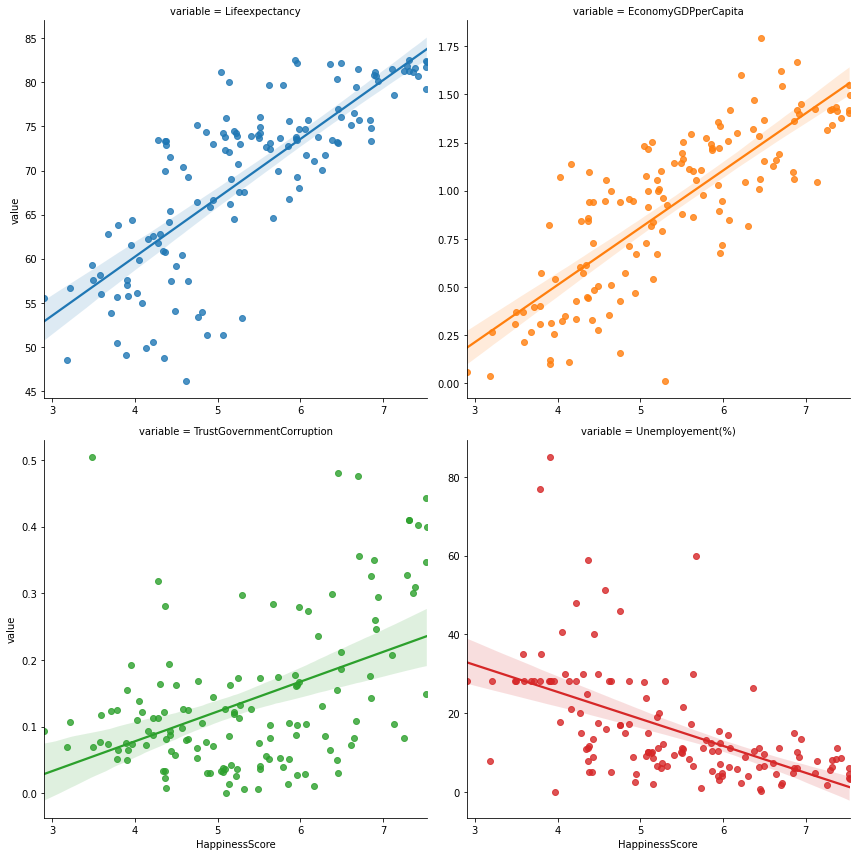

In [54]:
df = research_df_final[['HappinessScore', 'Lifeexpectancy', 'EconomyGDPperCapita', 'TrustGovernmentCorruption', 'Unemployement(%)']]
# x = df.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df['HappinessScore'] = x_scaled[:, 0
# df['Lifeexpectancy'] = x_scaled[:, 1]
# df['Economy(GDPperCapita)'] = x_scaled[:, 2]
# df['TrustGovernmentCorruption'] = x_scaled[:, 3]
# df['Unemployement(%)'] = x_scaled[:, 4]
df['HappinessScore'] = df['HappinessScore'].astype(float)
df['Lifeexpectancy'] =df['Lifeexpectancy'].astype(float)
df['EconomyGDPperCapita'] = df['EconomyGDPperCapita'].astype(float)
df['TrustGovernmentCorruption'] = df['TrustGovernmentCorruption'].astype(float)
df['Unemployement(%)'] = df['Unemployement(%)'].astype(float)
df = pd.melt(df, id_vars=['HappinessScore'])

sct = sns.lmplot(x="HappinessScore", y="value", col="variable", col_wrap=2, hue="variable", data=df, height=6, aspect=1, sharex=False,sharey=False)

The following scatterplot shows a direct relation between the happiness score of a country and life expectancy

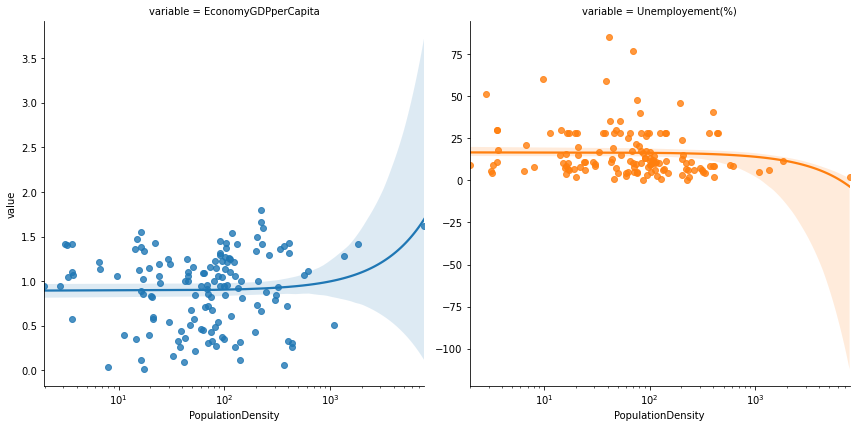

In [55]:
pop = research_df_final['Population']
area = research_df_final['Area']
den = pop/area
df = research_df_final[['EconomyGDPperCapita', 'Unemployement(%)']].astype(float)
df['PopulationDensity'] = den

# x = df.values
# min_max_scaler = preprocessing.MaxAbsScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df['Economy(GDPperCapita)'] = x_scaled[:, 0].astype(float)
# df['Unemployement(%)'] = x_scaled[:, 1].astype(float)
# df['PopulationDensity'] = x_scaled[:, 2].astype(float)
# df['PopulationDensity'] = np.log(df['PopulationDensity'])
# df['lognorm'] = np.log(df['norm'])

# z_scores = stats.zscore(df)
# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 3).all(axis=1)
# df = df[filtered_entries]
# "print"
df = pd.melt(df, id_vars=['PopulationDensity'])

sct = sns.lmplot(x="PopulationDensity", y="value", col="variable", hue="variable", data=df, height=6, aspect=1, sharex=False, sharey=False).set(xscale="log")

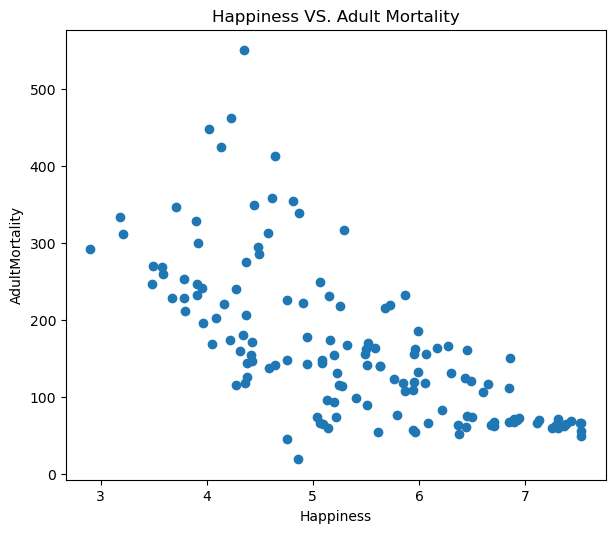

In [56]:
happy_vs_AM = plt.figure(figsize=(6,5),dpi=100)
ax_1 = happy_vs_AM.add_axes([0.1,0.1,0.9,0.9])
ax_1.set_xlabel('Happiness')
ax_1.set_ylabel('AdultMortality')
ax_1.set_title('Happiness VS. Adult Mortality')
ax_1.scatter(research_df_final['HappinessScore'],research_df_final['AdultMortality'])

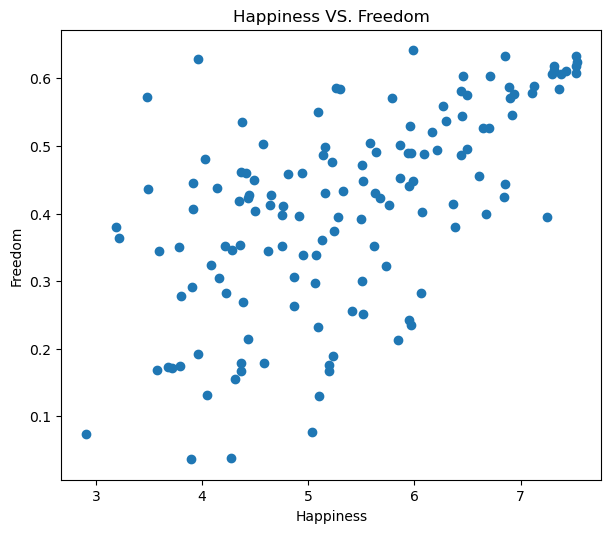

In [57]:

happy_vs_freedom = plt.figure(figsize=(6,5),dpi=100)
ax_2 = happy_vs_freedom.add_axes([0.1,0.1,0.9,0.9]) 
ax_2.set_xlabel('Happiness')
ax_2.set_ylabel('Freedom')
ax_2.set_title('Happiness VS. Freedom')
ax_2.scatter(research_df_final['HappinessScore'],research_df_final['Freedom'])

<ipython-input-58-9dec9823d8de>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diseases_1['HappinessScore'] = df_diseases_1['HappinessScore'].astype(float)
<ipython-input-58-9dec9823d8de>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diseases_1['HepatitisB'] = df_diseases_1['HepatitisB'].astype(float)
<ipython-input-58-9dec9823d8de>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

0.10625000000000002


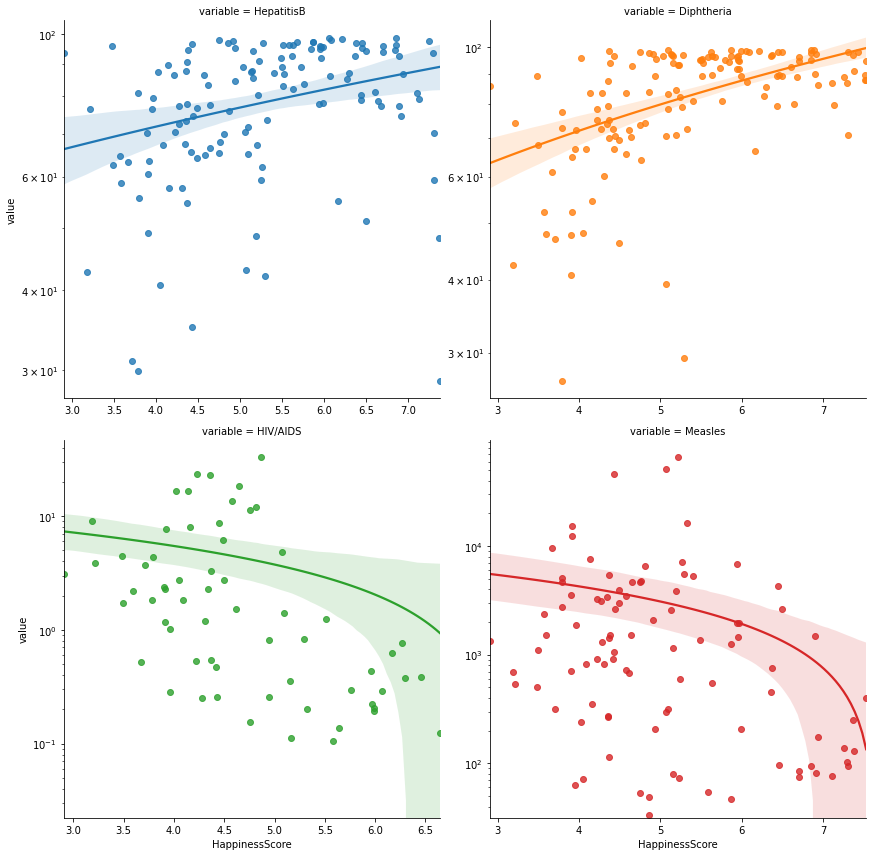

In [58]:
def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.35)
    Q3 = df.quantile(0.55)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList

from scipy import stats
df_diseases_1 = research_df_final[['HappinessScore', 'HepatitisB', 'Diphtheria','HIV/AIDS', 'Measles']]
df_diseases_1['HappinessScore'] = df_diseases_1['HappinessScore'].astype(float)
df_diseases_1['HepatitisB'] = df_diseases_1['HepatitisB'].astype(float)
df_diseases_1['Diphtheria'] = df_diseases_1['Diphtheria'].astype(float)
df_diseases_1['HIV/AIDS'] = df_diseases_1['HIV/AIDS'].astype(float)[df_diseases_1['HIV/AIDS'] > 0.10000000000000002]
print(df_diseases_1['HIV/AIDS'].min())
df_diseases_1['Measles'] = df_diseases_1['Measles'].astype(float)
df_diseases_1 = pd.melt(df_diseases_1, id_vars=['HappinessScore'])

#list = Remove_Outlier_Indices(df_diseases_1)

#df_test = df_diseases_1[list]

sct = sns.lmplot(x="HappinessScore", y="value", col="variable", col_wrap=2, hue="variable", data=df_diseases_1, height=6, aspect=1, sharex=False,sharey=False).set(yscale="log")

In [132]:
subregion_df = research_df_final.groupby("Subregion").mean()
subregion_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, Australia and New Zealand to Western Europe
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HappinessScore             19 non-null     float64
 1   EconomyGDPperCapita        19 non-null     float64
 2   HealthLifeExpectancy       19 non-null     float64
 3   Freedom                    19 non-null     float64
 4   TrustGovernmentCorruption  19 non-null     float64
 5   Generosity                 19 non-null     float64
 6   Socialsupport              19 non-null     float64
 7   Population                 19 non-null     float64
 8   Area                       19 non-null     float64
 9   Lifeexpectancy             19 non-null     float64
 10  AdultMortality             19 non-null     float64
 11  infantdeaths               19 non-null     float64
 12  Alcohol                    19 non-null     float64
 13  HepatitisB           

Text(0.5, 0, 'Subregion')

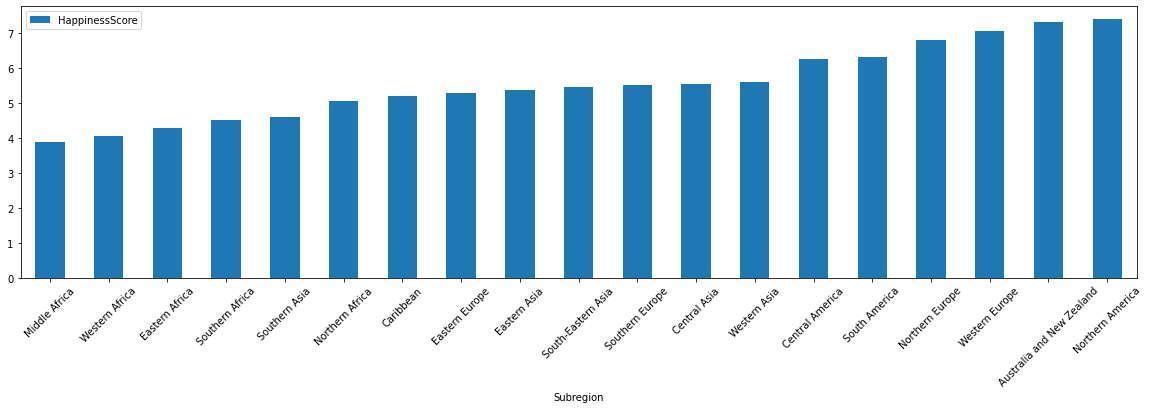

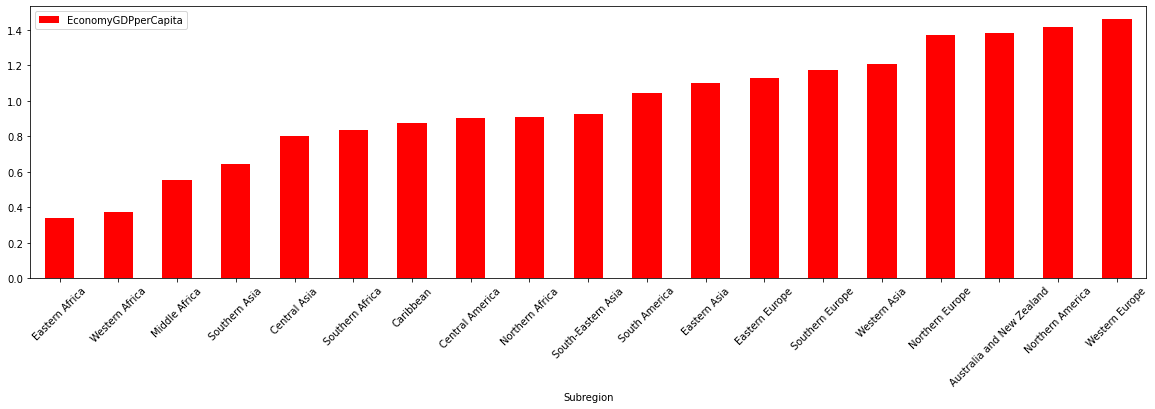

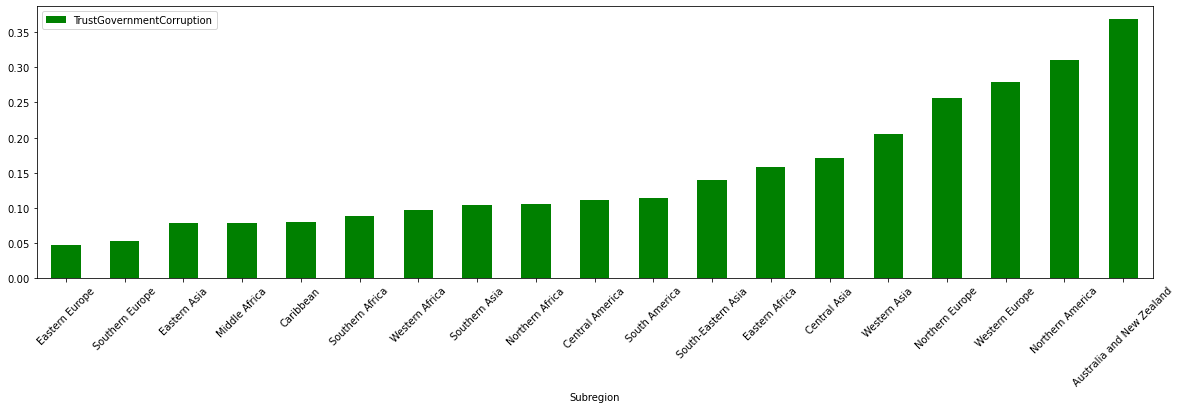

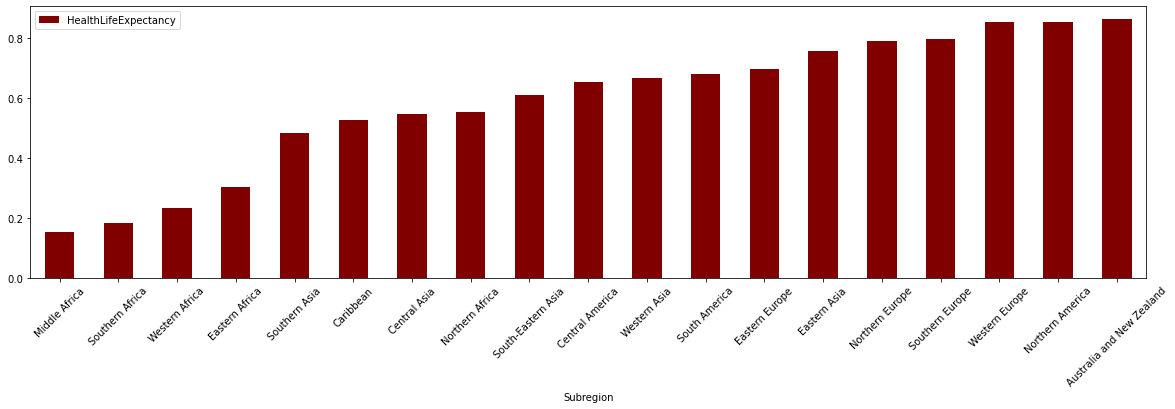

In [60]:
ax = subregion_df[["HappinessScore"]].sort_values("HappinessScore").plot.bar(rot=45,figsize=(20,5),stacked=True)
ax = subregion_df[["EconomyGDPperCapita"]].sort_values("EconomyGDPperCapita").plot.bar(rot=45,figsize=(20,5),stacked=True, color="red")
ax = subregion_df[["TrustGovernmentCorruption"]].sort_values("TrustGovernmentCorruption").plot.bar(rot=45,figsize=(20,5),stacked=True,color="green")
ax = subregion_df[["HealthLifeExpectancy"]].sort_values("HealthLifeExpectancy").plot.bar(rot=45,figsize=(20,5),stacked=True,color="maroon")
ax.set_xlabel("Subregion")


Alcohol consumption research by subregion and it's relation with diseases


Subregions that consume alcohol the most

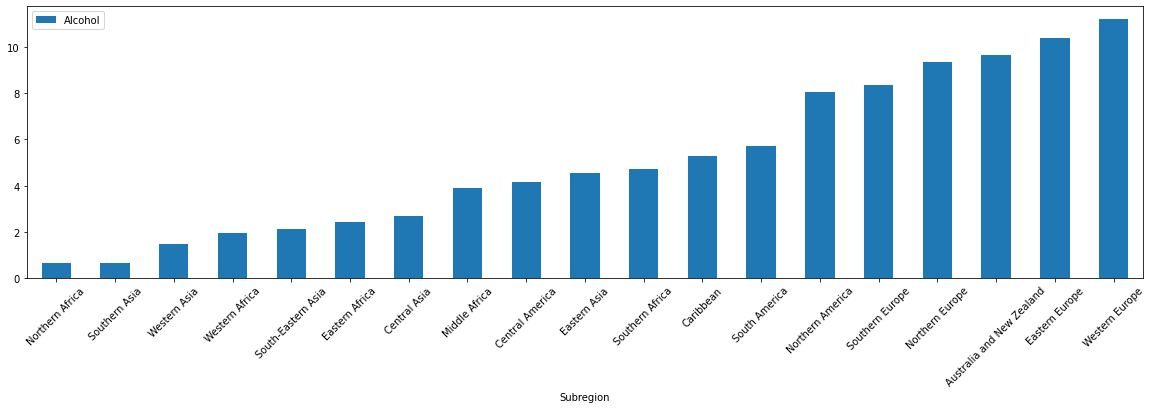

In [61]:
ax = subregion_df[["Alcohol"]].sort_values("Alcohol").plot.bar(rot=45,figsize=(20,5))

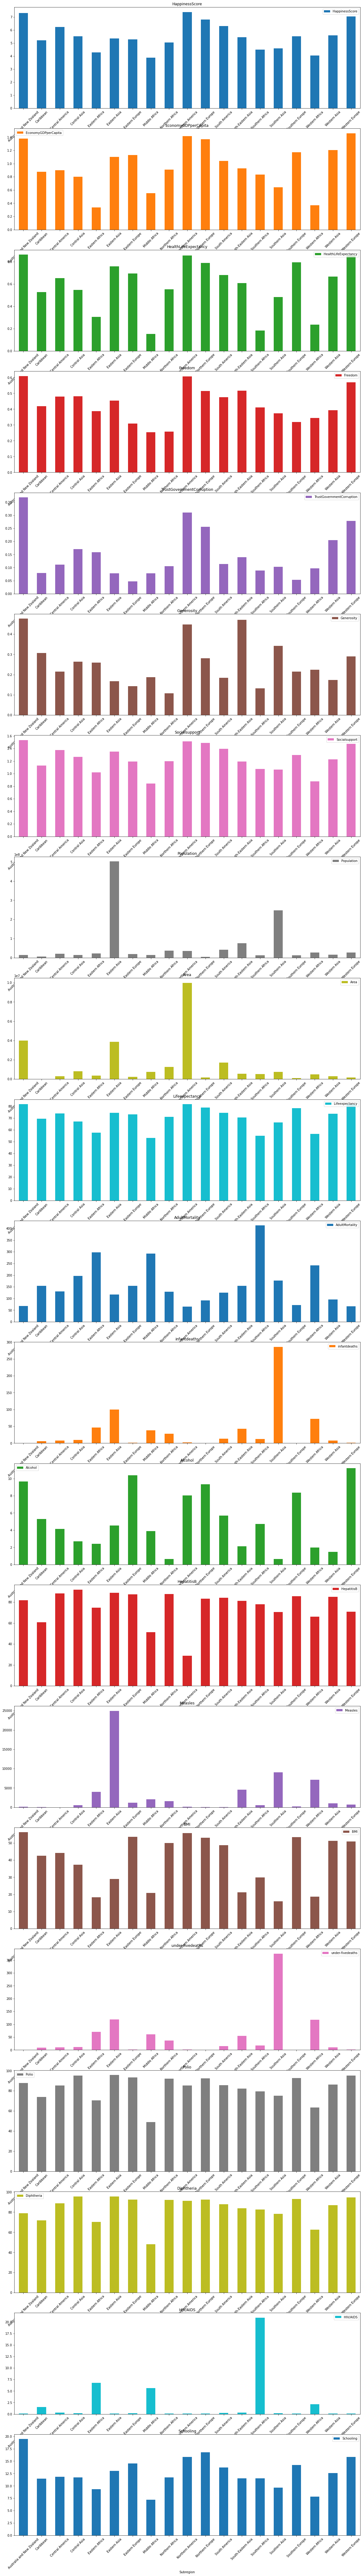

In [62]:
subregion_df.transpose()
ax = subregion_df.plot.bar(subplots=True,figsize=(20,150),sharey=False, sharex=False,rot=45)

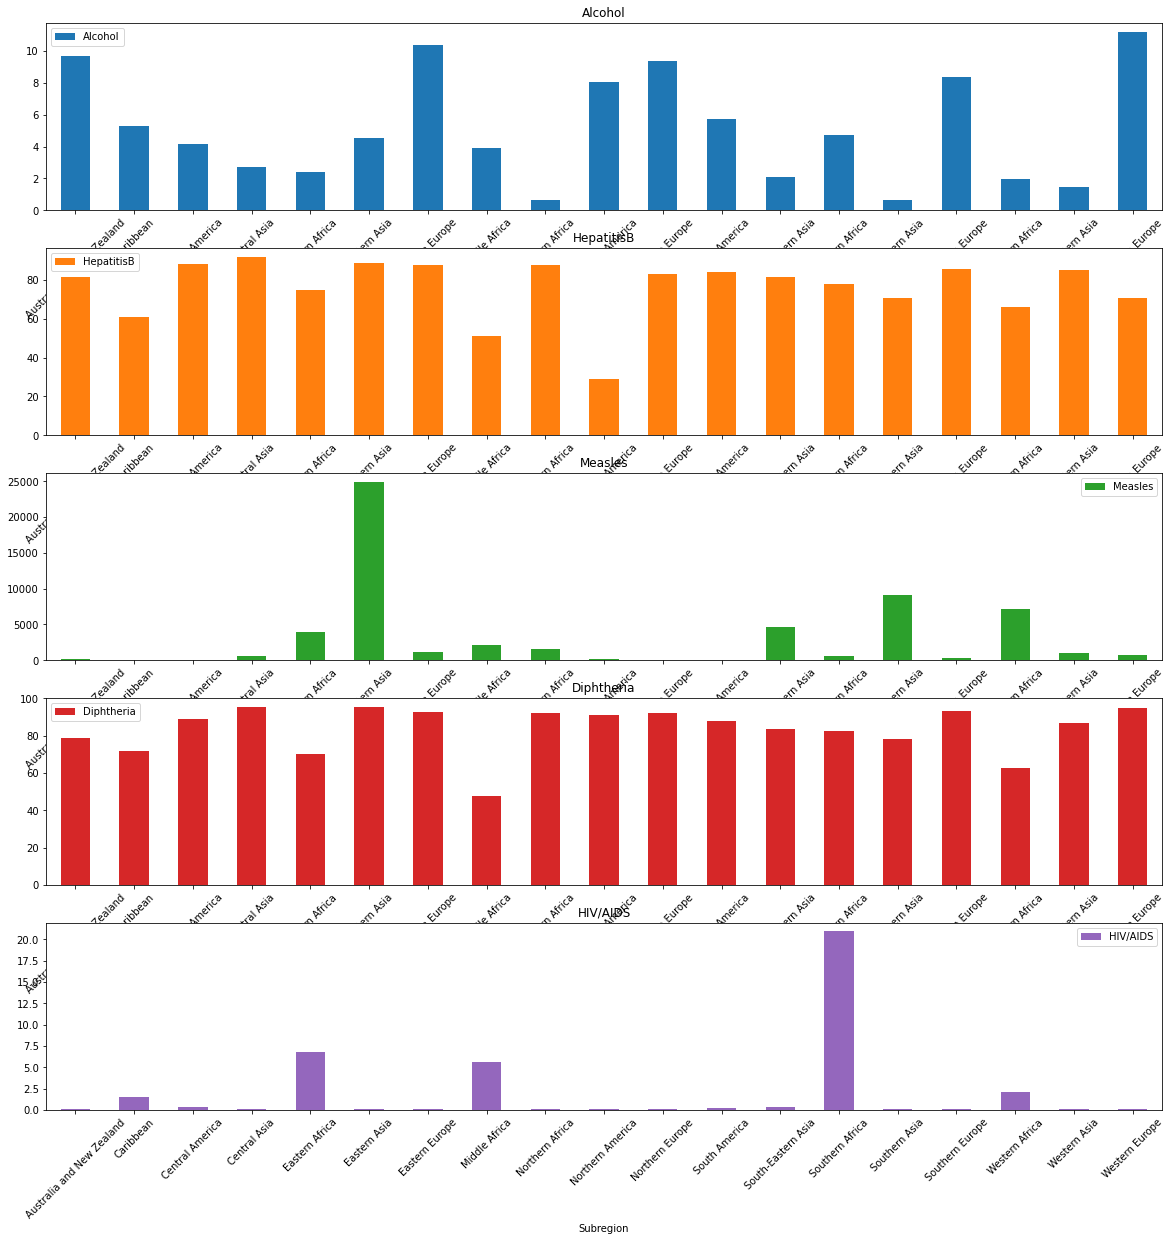

In [154]:
subregion_df_alcohol = subregion_df.copy()
subregion_df_alcohol = subregion_df_alcohol[["Alcohol", "HepatitisB","Measles","Diphtheria","HIV/AIDS"]]

subregion_df_alcohol
#subregion_df
#df_subregion_Australia['Alcohol'] = df_subregion_Australia['Alcohol'].astype(float)
#df_subregion_Australia['HepatitisB'] = df_subregion_Australia['HepatitisB'].astype(float)
#df_subregion_Australia['Diphtheria'] = df_subregion_Australia['Diphtheria'].astype(float)
#df_subregion_Australia['HIV/AIDS'] = df_subregion_Australia['HIV/AIDS'].astype(float)
#df_subregion_Australia['Measles'] = df_subregion_Australia['Measles'].astype(float)

#subregion_df_alcohol = pd.melt(subregion_df_alcohol, id_vars=['Alcohol'])

ax = subregion_df_alcohol.plot.bar(subplots=True,figsize=(20,20),sharey=False, sharex=False,rot=45)

Let's investigate Europe further

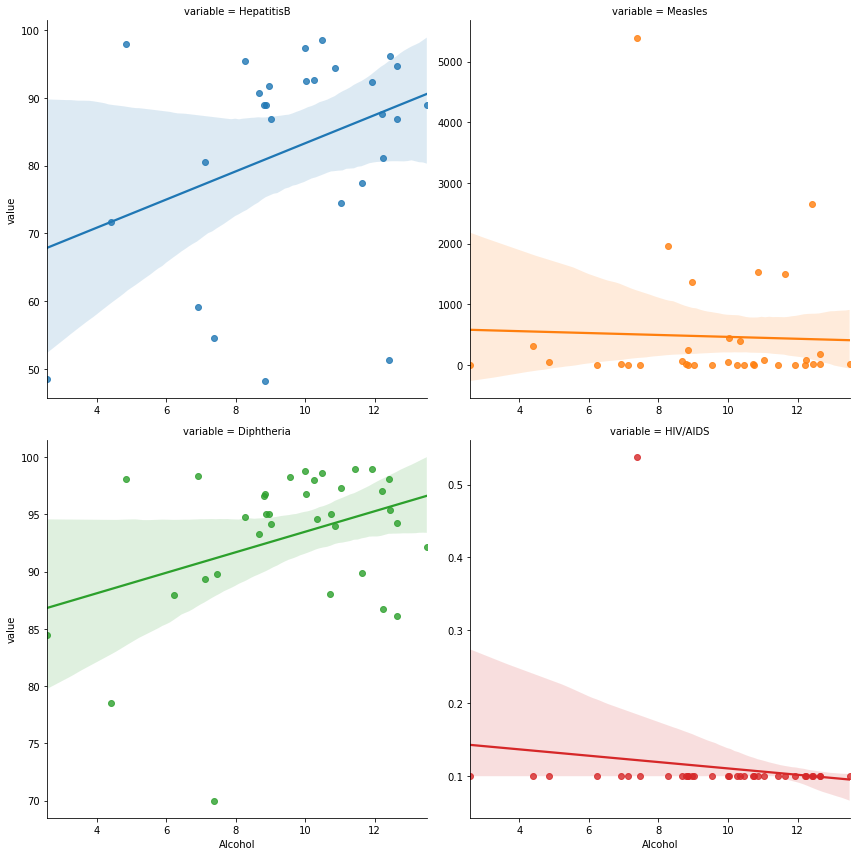

In [174]:
research_df_final
europe_df = research_df_final.loc[research_df_final["Region"] == "Europe"]
europe_df = europe_df[["Alcohol", "HepatitisB","Measles","Diphtheria","HIV/AIDS"]]

europe_df = pd.melt(europe_df, id_vars=['Alcohol'])
sct = sns.lmplot(x="Alcohol", y="value", col="variable", col_wrap=2, hue="variable", data=europe_df, height=6, aspect=1, sharex=False,sharey=False)

Let's investigate Africa further

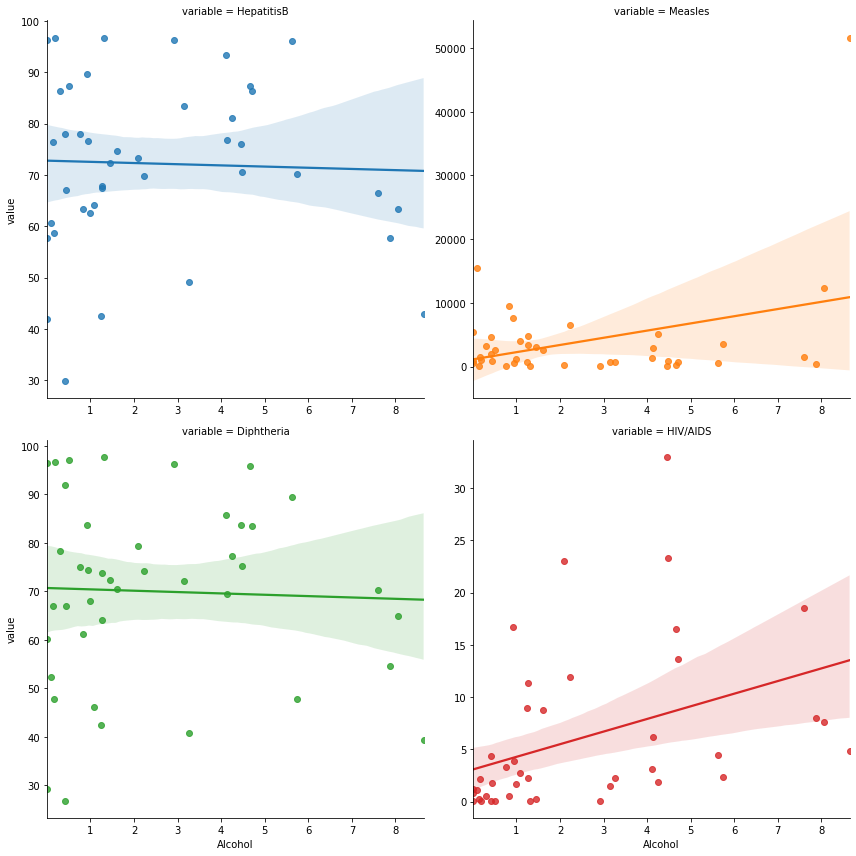

In [180]:
research_df_final
africa_df = research_df_final.loc[research_df_final["Region"] == "Africa"]
africa_df = africa_df[["Alcohol", "HepatitisB","Measles","Diphtheria","HIV/AIDS"]]
africa_df = pd.melt(africa_df, id_vars=['Alcohol'])
sct = sns.lmplot(x="Alcohol", y="value", col="variable", col_wrap=2, hue="variable", data=africa_df, height=6, aspect=1, sharex=False,sharey=False)

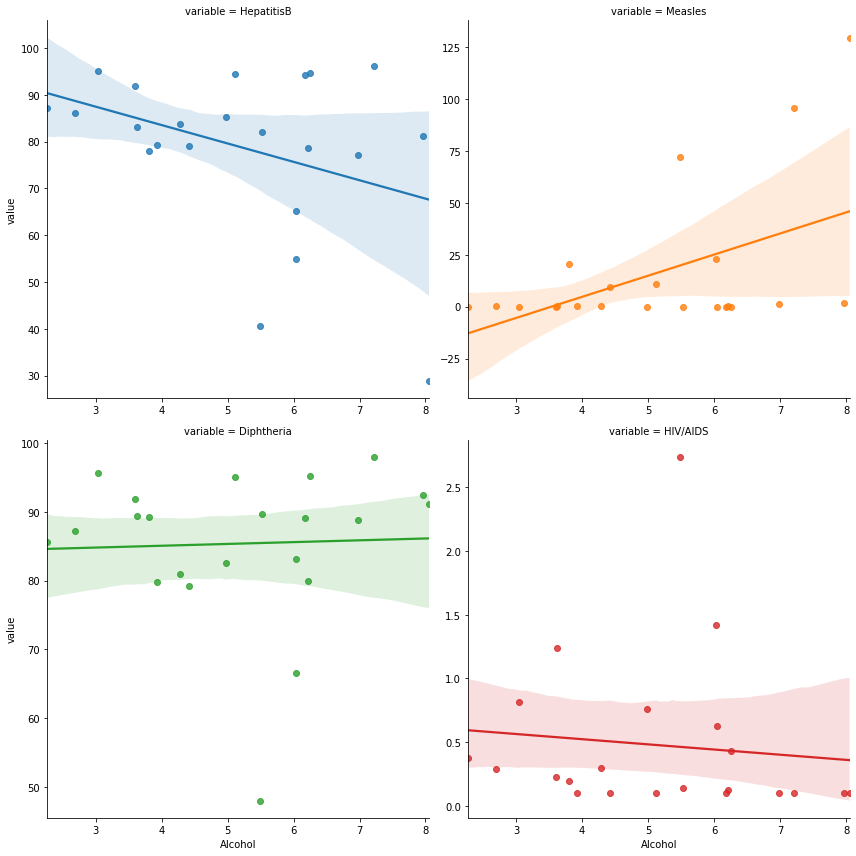

In [189]:
research_df_final["Region"].unique()
north_america_df = research_df_final.loc[research_df_final["Region"] == "Americas"]
north_america_df = north_america_df[["Alcohol", "HepatitisB","Measles","Diphtheria","HIV/AIDS"]]
north_america_df = pd.melt(north_america_df, id_vars=['Alcohol'])
sct = sns.lmplot(x="Alcohol", y="value", col="variable", col_wrap=2, hue="variable", data=north_america_df, height=6, aspect=1, sharex=False,sharey=False)

RESEARCH QUESTIONS:
1)Happiness and how life expectancy affects it in differents regions
2)Happiness is directly co-related to high GDPperCapita, Trust in gov and Life expectancy, but it is negatively affected by high unemployment
3)Effect of population density on Economy and Unemployement
4)How different diseases affect happiness in countries
5)Alcohol consumption between subregions
6)How high or low alcohol consumption in regions affects diseases, further investigated in Americas, Europe and Africa. For example, High Alcohol consumption in Europe and high perccentage in Hepatitis B vs. Low Alcohol consumption in Africa and low percentage in Hepatitis B